In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MLP_manual.mlp import MLP, MLP2

Learning to multiplications numbers from 0 to 1

In [119]:
mlp_mul = MLP(2, [3, 2], 1)

In [120]:
for _ in range(500):
    n_samples = 1000
    X = np.random.rand(2, n_samples)
    Y = X[0] * X[1]
    Y.shape = (-1, n_samples)
    mlp_mul.fit(X, Y, 50, 3, show = False)

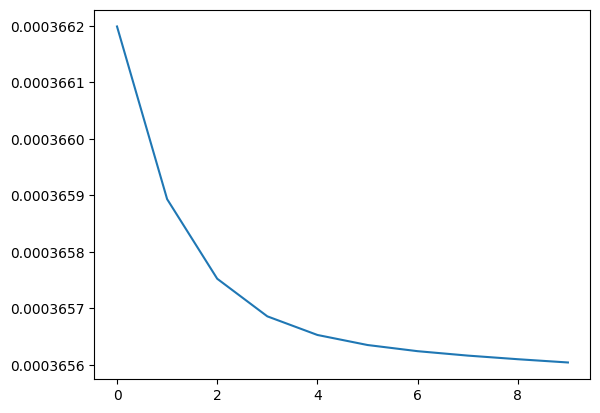

In [121]:
mlp_mul.fit(X, Y, 10, 0.5, show = True)

In [122]:
m_samples = 5
X_test = np.random.rand(2, m_samples)
Y_test = X_test[0] * X_test[1]
Y_test.shape = (-1, m_samples)
print("X is: \n", X_test)
print('What mlp thinks about multiplication \n', mlp_mul.forward_propagat(X_test))
print('error is \n', Y_test - mlp_mul.forward_propagat(X_test))

X is: 
 [[0.1143688  0.81052156 0.13991355 0.51102272 0.2713351 ]
 [0.29595551 0.43120218 0.42041972 0.49820328 0.40692837]]
What mlp thinks about multiplication 
 [[0.04001289 0.34713805 0.05908583 0.24667998 0.09932133]]
error is 
 [[-0.00616481  0.00236061 -0.00026342  0.00791322  0.01109262]]


In [149]:
mlp2_mul = MLP2([(2, ), (3, 'sigmoid'), (2, 'sigmoid'), (1, 'sigmoid')])

In [154]:
for _ in range(1000):
    n_samples = 1000
    X = np.random.rand(n_samples, 2)
    Y = X[:, 0] * X[:, 1]
    Y.shape = (n_samples, -1)
    mlp2_mul.fit(X, Y, 50, 3, batch_size=1000, show_los = False)

In [155]:
m_samples = 5
X_test = np.random.rand(m_samples, 2)
Y_test = X_test[:, 0] * X_test[:, 1]
Y_test.shape = (m_samples, -1)
print("X is: \n", X_test)
print('What mlp thinks about multiplication \n', mlp2_mul.forward_propagat(X_test))
print('error is \n', Y_test - mlp2_mul.forward_propagat(X_test))

X is: 
 [[0.0806993  0.40082387]
 [0.03184058 0.82761393]
 [0.60214041 0.36378957]
 [0.31819048 0.58096852]
 [0.83260208 0.75179714]]
What mlp thinks about multiplication 
 [[0.03260223]
 [0.04843067]
 [0.22706475]
 [0.19018459]
 [0.62214975]]
error is 
 [[-0.00025602]
 [-0.02207896]
 [-0.00801235]
 [-0.00532594]
 [ 0.00379811]]


## here is digit recognition mlp

In [199]:
from get_dataset import DigitExample, show_array_as_image, jpg2data

In [175]:
X, Y = jpg2data(3000)
X_test, Y_test = jpg2data(500, False)

In [176]:
X = X.astype(float)/255
X_test = X_test.astype(float)/255

shuffle data

In [181]:
## for train
n_samples = X.shape[0]
print('n_samples = ', n_samples)
indexes = np.arange(0, n_samples, 1)
np.random.shuffle(indexes)
X = X[indexes, :]
Y = Y[indexes, :]
## for test
m_samples = X_test.shape[0]
indexes = np.arange(0, m_samples, 1)
np.random.shuffle(indexes)
X_test = X_test[indexes, :]
Y_test = Y_test[indexes, :]

n_samples =  30000


shuffle result

6


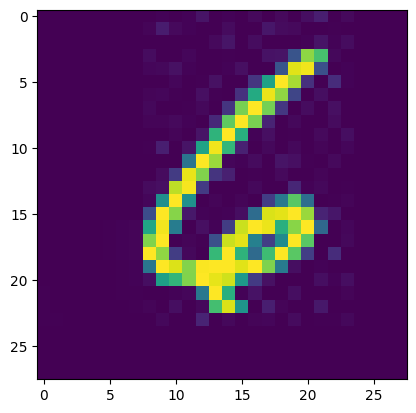

In [185]:
i = 2
show_array_as_image(X[i,:].reshape(28, 28), Y[i,:])

In [241]:
mlp_digit = MLP(784, [15, 15], 10)

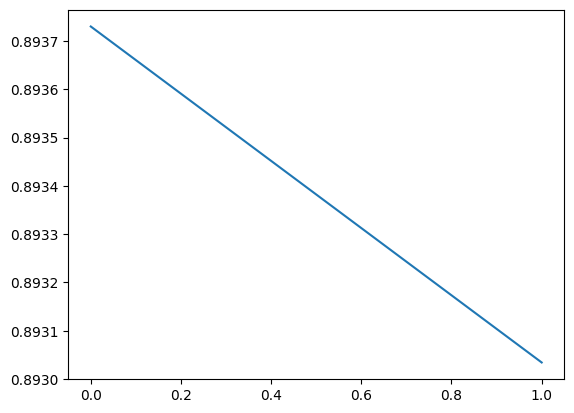

In [245]:
batch_size = 100
n_batches = n_samples // batch_size
for _ in range(5):
    for i in range(n_batches):
        X_certain = X[i*batch_size: (i+1)*batch_size:, :].T
        Y_certain = Y[i*batch_size: (i+1)*batch_size:, :].T
        mlp_digit.fit(X_certain, Y_certain, 5, 0.3, show = False)
mlp_digit.fit(X_certain, Y_certain, 2, 0.3, show = True)

6
What thinks about it human:  6
What thinks about it MLP:  5


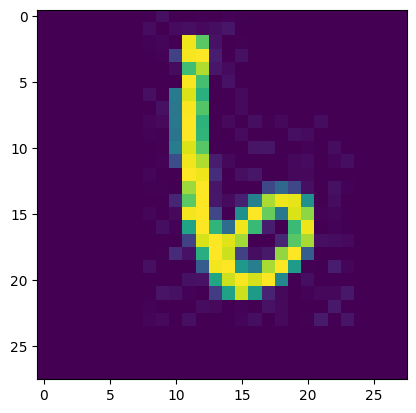

In [246]:
i = 4550
show_array_as_image(X_test[i,:].reshape(28, 28), Y_test[i,:])
print("What thinks about it human: ", np.argmax(Y_test[i,:]))
print("What thinks about it MLP: ", np.argmax(mlp_digit.forward_propagat(X_test[i,:].T)))

In [219]:
mlp2_digit = MLP2([(784, ), (15, 'sigmoid'), (15, 'tanh'), (10, 'sigmoid')])

In [220]:
batch_size = 100
n_batches = n_samples // batch_size
for _ in range(5):
    for i in range(n_batches):
        X_certain = X[i*batch_size: (i+1)*batch_size:, :]
        Y_certain = Y[i*batch_size: (i+1)*batch_size:, :]
        mlp2_digit.fit(X_certain, Y_certain, 25, 3, show_los = False)

3
What thinks about it human:  3
What thinks about it MLP:  5


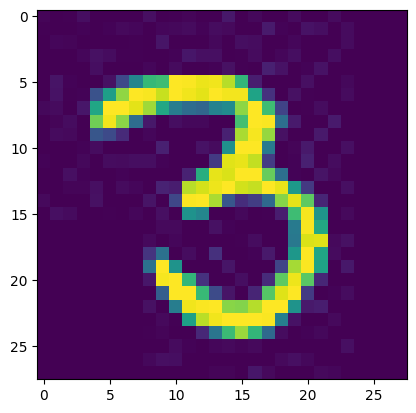

In [229]:
i = 4110
show_array_as_image(X_test[i,:].reshape(28, 28), Y_test[i,:])
print("What thinks about it human: ", np.argmax(Y_test[i,:]))
print("What thinks about it MLP: ", np.argmax(mlp2_digit.forward_propagat(X_test[i,:].reshape(1, 784))))